In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datafnb/DataFB.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
Scaler = StandardScaler()

X = Scaler.fit_transform(X)

In [6]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [7]:
pca = PCA(n_components=3)

principal_components = pca.fit_transform(X)

new_X = pd.DataFrame(data = principal_components, columns=['PC1','PC2','PC3'])

In [8]:
new_X.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


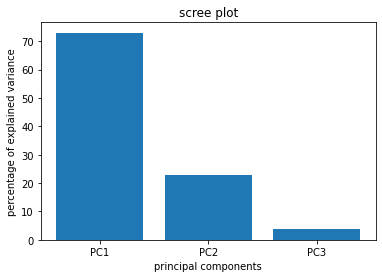

In [9]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals =1)

label = ['PC' + str(x) for x in range (1, len(per_var)+1)]

plt.bar (x=range(1, len(per_var)+1),height=per_var,tick_label=label)
plt.ylabel('percentage of explained variance')
plt.xlabel('principal components')
plt.title('scree plot')
plt.show()

In [10]:
new_X.describe()

,PC1,PC2,PC3
count,1.500000e+02,1.500000e+02,1.500000e+02
mean,5.684342e-16,1.154632e-16,1.421085e-16
std,1.714084e+00,9.592523e-01,3.843720e-01
min,-2.774345e+00,-2.654073e+00,-8.574218e-01
25%,-2.102721e+00,-5.984875e-01,-2.590613e-01
50%,4.183111e-01,1.750202e-02,2.476241e-02
75%,1.343027e+00,5.940342e-01,1.945133e-01
max,3.310696e+00,2.686284e+00,1.005401e+00


In [11]:
display(new_X)

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


<Figure size 1440x1440 with 0 Axes>

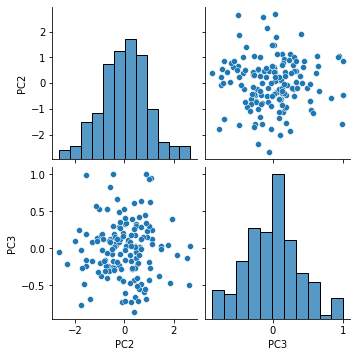

In [12]:
plt.figure(figsize=(20, 20))
sns.pairplot(new_X, vars = new_X.columns[1:6]);

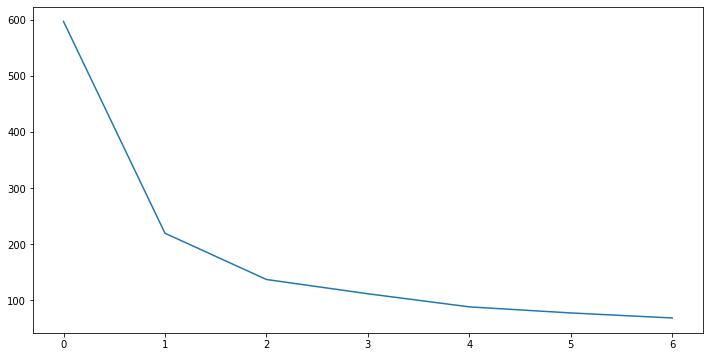

In [13]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 8):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_X.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia)

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=12, random_state=0)
label = kmeans.fit(new_X.values)

In [15]:
new_X['target'] = y
new_X['fit'] = kmeans.labels_

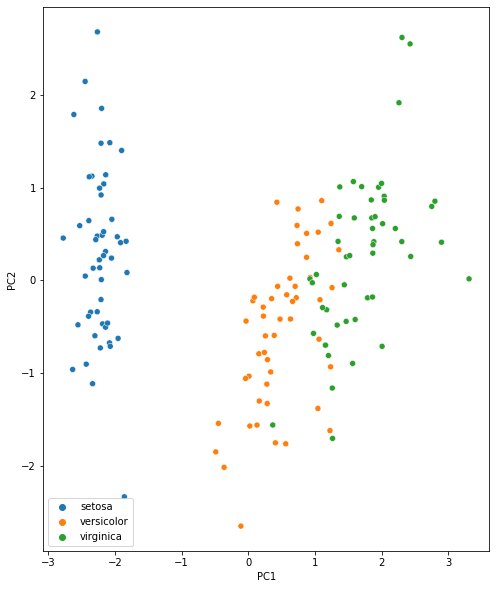

In [16]:
plt.rcParams["figure.figsize"] = (8,10)
sns.scatterplot(x='PC1', y='PC2', hue=new_X.target.to_list(), data=new_X);

In [17]:
new_X.head(22)

,PC1,PC2,PC3,target,fit
0,-2.264703,0.480027,-0.127706,setosa,3
1,-2.080961,-0.674134,-0.234609,setosa,0
2,-2.364229,-0.341908,0.044201,setosa,0
3,-2.299384,-0.597395,0.091290,setosa,0
4,-2.389842,0.646835,0.015738,setosa,3
5,-2.075631,1.489178,0.026968,setosa,3
6,-2.444029,0.047644,0.335470,setosa,0
7,-2.232847,0.223148,-0.088695,setosa,0
8,-2.334640,-1.115328,0.145077,setosa,0
9,-2.184328,-0.469014,-0.253766,setosa,0


In [18]:
new_X.insert(0,"Kategori",np.nan,True)
new_X.loc[new_X['fit'] == 0, 'Kategori'] = 0
new_X.loc[new_X['fit'] == 1, 'Kategori'] = 1
new_X.loc[new_X['fit'] == 2, 'Kategori'] = 2
new_X.loc[new_X['fit'] == 3, 'Kategori'] = 3
new_X['Kategori'] = new_X['Kategori'].astype(int)
new_X.head(10)

,Kategori,PC1,PC2,PC3,target,fit
0,3,-2.264703,0.480027,-0.127706,setosa,3
1,0,-2.080961,-0.674134,-0.234609,setosa,0
2,0,-2.364229,-0.341908,0.044201,setosa,0
3,0,-2.299384,-0.597395,0.091290,setosa,0
4,3,-2.389842,0.646835,0.015738,setosa,3
5,3,-2.075631,1.489178,0.026968,setosa,3
6,0,-2.444029,0.047644,0.335470,setosa,0
7,0,-2.232847,0.223148,-0.088695,setosa,0
8,0,-2.334640,-1.115328,0.145077,setosa,0
9,0,-2.184328,-0.469014,-0.253766,setosa,0


In [19]:
new_X.drop(["fit","target"], axis=1, inplace=True)
new_X.columns = ['Kategori','PC1 (St.)','PC2 (St.)', 'PC3 (St.)']
new_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kategori   150 non-null    int64  
 1   PC1 (St.)  150 non-null    float64
 2   PC2 (St.)  150 non-null    float64
 3   PC3 (St.)  150 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.8 KB


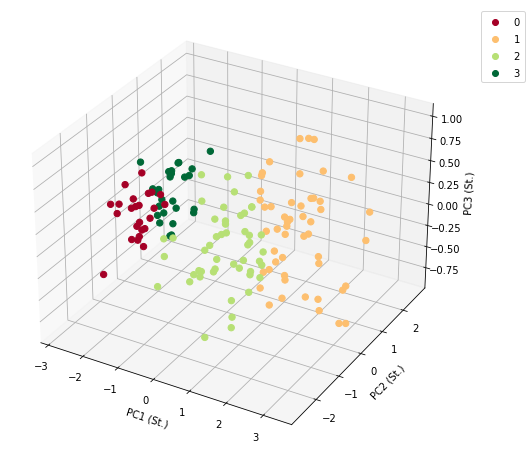

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_X['PC1 (St.)']
y = new_X['PC2 (St.)']
z = new_X['PC3 (St.)']

ax.set_xlabel("PC1 (St.)")
ax.set_ylabel("PC2 (St.)")
ax.set_zlabel("PC3 (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_X['Kategori'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

In [21]:
kmeans.cluster_centers_

array([[-2.22497696, -0.45675386, -0.00704898],
       [ 1.66999509,  0.54742243,  0.018389  ],
       [ 0.53199813, -0.86459013,  0.0245738 ],
       [-2.22454658,  0.97724866, -0.07587613]])

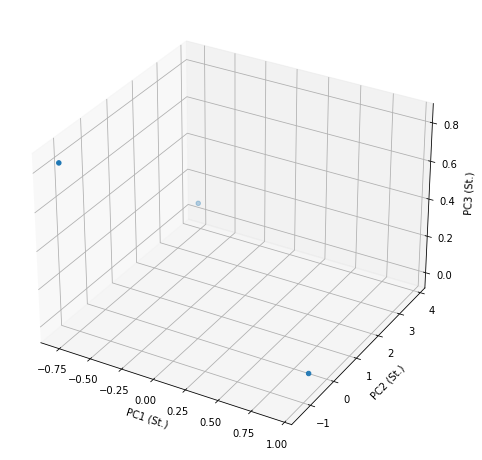

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [-0.73892945, -0.77667668,  0.92855069]
y = [3.84479593, -1.40197943, -0.38134442]
z = [0.07820117,  0.83620382, -0.02182411]

ax.set_xlabel("PC1 (St.)")
ax.set_ylabel("PC2 (St.)")
ax.set_zlabel("PC3 (St.)")
ax.scatter(x, y, z)
plt.show()